# Qualidade das laranjas

## InterData



*   Andre Pessoa (andre.pessoa92@hotmail.com)
*   Carlos Augusto (carlosaugustoestudante1202@gmail.com)
*   Pedro Luis (gilbonett@gmail.com)
*   Welington Júlio (welington.julio.rodrigues@gmail.com)
*   Juan Araújo (juan.araujo@ufms.br)
*   Erivelton Sousa (eriveltonsousa32@gmail.com)

## Importação das bibliotecas

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Ferramentas de Pré-processamento e Avaliação
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Carregando o dataset
df = pd.read_csv("https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/orange_quality.csv")

# Renomeando colunas para facilitar o manuseio
df.columns = [
    'Size_cm', 'Weight_g', 'Brix', 'pH', 'Softness',
    'HarvestTime_days', 'Ripeness', 'Color', 'Variety',
    'Blemishes', 'Quality'
]

print("Shape do DataFrame:", df.shape)
df.head()

Shape do DataFrame: (241, 11)


,Size_cm,Weight_g,Brix,pH,Softness,HarvestTime_days,Ripeness,Color,Variety,Blemishes,Quality
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


Informações básicas do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Size_cm           241 non-null    float64
 1   Weight_g          241 non-null    int64  
 2   Brix              241 non-null    float64
 3   pH                241 non-null    float64
 4   Softness          241 non-null    float64
 5   HarvestTime_days  241 non-null    int64  
 6   Ripeness          241 non-null    float64
 7   Color             241 non-null    object 
 8   Variety           241 non-null    object 
 9   Blemishes         241 non-null    object 
 10  Quality           241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB

Verificação de dados faltantes:
Size_cm             0
Weight_g            0
Brix                0
pH                  0
Softness            0
HarvestTime_days    0
Ripeness            0


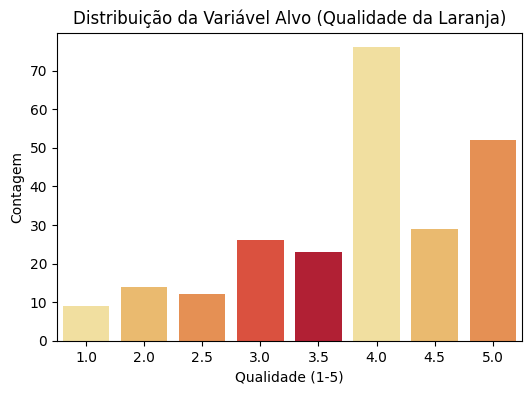

Comentário: O gráfico acima mostra a distribuição dos diferentes níveis de qualidade das laranjas.


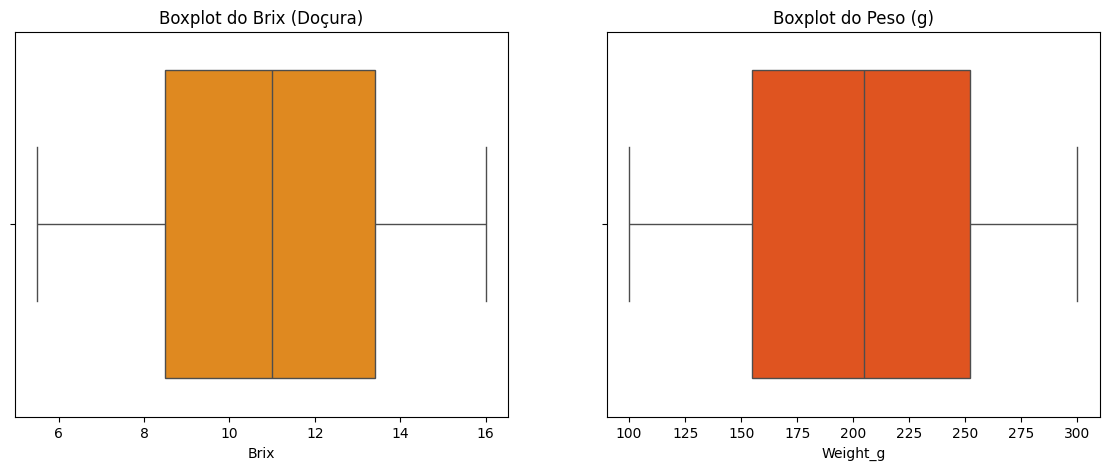

Comentário: Os boxplots permitem visualizar a distribuição e a presença de outliers em variáveis numéricas.
Optou-se por não remover os outliers neste momento.


In [ ]:

print("Informações básicas do DataFrame:")
df.info()

print("\nVerificação de dados faltantes:")
print(df.isnull().sum())



print("\nVerificação de dados faltantes após tratamento:")
print(df.isnull().sum())


# --- Visualizações ---

orange_palette = sns.color_palette("YlOrRd", 5)

# 1. Distribuição da variável alvo ('Quality')
plt.figure(figsize=(6, 4))
sns.countplot(x='Quality', data=df, palette=orange_palette)
plt.title('Distribuição da Variável Alvo (Qualidade da Laranja)')
plt.ylabel('Contagem')
plt.xlabel('Qualidade (1-5)')
plt.show()
print("Comentário: O gráfico acima mostra a distribuição dos diferentes níveis de qualidade das laranjas.")


# 2. Análise de Outliers em variáveis numéricas importantes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.boxplot(ax=axes[0], x=df['Brix'], color='darkorange') # Cor específica para boxplot
axes[0].set_title('Boxplot do Brix (Doçura)')
sns.boxplot(ax=axes[1], x=df['Weight_g'], color='orangered') # Outra cor específica para boxplot
axes[1].set_title('Boxplot do Peso (g)')
plt.show()
print("Comentário: Os boxplots permitem visualizar a distribuição e a presença de outliers em variáveis numéricas.")
print("Optou-se por não remover os outliers neste momento.")




### **Definição do Problema**

O objetivo deste projeto é prever a qualidade de laranjas com base em suas características físicas e químicas. A variável alvo `Quality` é uma nota contínua. Para este estudo, o problema foi modelado como uma **tarefa de classificação multiclasse**, onde a nota de qualidade foi arredondada para o inteiro mais próximo (1 a 5). Esta abordagem foi escolhida para avaliar a capacidade dos modelos em categorizar as laranjas em níveis de qualidade discretos.

### **Estratégia de Pré-processamento**

1.  **Tratamento de Dados Faltantes:** Embora o dataset original não apresente dados faltantes, a pipeline de pré-processamento foi construída com `SimpleImputer` para garantir robustez, preenchendo possíveis valores ausentes com a **mediana** para features numéricas e a **moda** para categóricas.
2.  **Codificação de Variáveis Qualitativas:** As features categóricas (`Color`, `Variety`, `Blemishes`) foram transformadas usando `OneHotEncoder`. Esta técnica é ideal pois cria variáveis binárias para cada categoria, evitando que os modelos interpretem uma ordem inexistente entre elas (ex: "Valencia" não é maior ou menor que "Navel").
3.  **Normalização de Variáveis Quantitativas:** Utilizou-se o `StandardScaler` para padronizar as features numéricas. Isso é fundamental para o bom desempenho de algoritmos sensíveis à escala, como Regressão Logística, kNN e SVM.

### **Validação, Modelos e Métricas**

* **Validação:** Foi utilizada a **Validação Cruzada K-Fold (k=10)** para obter uma estimativa de desempenho mais estável e confiável para cada modelo.
* **Modelos Selecionados:** Para uma análise comparativa, foram escolhidos quatro modelos:
    * **Regressão Logística:** Um modelo linear robusto, servindo como um excelente *baseline* para problemas de classificação.
    * **Árvore de Decisão:** Um modelo não-linear que pode capturar interações complexas entre as features.
    * **k-Nearest Neighbors (kNN):** Um modelo baseado em instância que classifica com base na proximidade dos vizinhos.
    * **Support Vector Machine (SVM):** Um modelo poderoso que busca encontrar o melhor hiperplano que separa as classes.
* **Métricas de Avaliação:** Como se trata de uma classificação multiclasse, foram utilizadas:
    * **Acurácia:** Percentual geral de acertos.
    * **F1-Score (Macro):** Métrica principal para esta análise. A média "macro" calcula o F1-Score para cada classe independentemente e depois tira a média, tratando todas as classes como igualmente importantes. É uma excelente métrica para avaliar o desempenho geral em problemas multiclasse.

In [ ]:
# Separando as features (X) e o alvo (y)
X = df.drop('Quality', axis=1)

y = df['Quality'].round().astype(int)


# Identificando colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

print("Colunas Numéricas:", numeric_features)
print("Colunas Categóricas:", categorical_features)


# --- Construção dos Pipelines de Pré-processamento ---

# Pipeline para dados numéricos: imputa com a mediana e depois normaliza
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para dados categóricos: imputa com a moda e depois aplica OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Juntando os pipelines com um ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Mantém colunas não especificadas (se houver)
)


Colunas Numéricas: ['Size_cm', 'Weight_g', 'Brix', 'pH', 'Softness', 'HarvestTime_days', 'Ripeness']
Colunas Categóricas: ['Color', 'Variety', 'Blemishes']


In [ ]:


# Definindo os modelos a serem comparados
models = {
    'Regressão Logística': LogisticRegression(random_state=42),
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42)
}

# Lista para armazenar os resultados
results_list = []

# Definindo a estratégia de validação cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Métricas a serem calculadas
scoring_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']


# Loop para treinar e avaliar cada modelo
for name, model in models.items():
    # Cria o pipeline final, juntando pré-processador e o modelo
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Executa a validação cruzada
    scores = cross_validate(model_pipeline, X, y, cv=cv, scoring=scoring_metrics)

    # Armazena os resultados
    results_list.append({
        'Modelo': name,
        'Acurácia': scores['test_accuracy'].mean(),
        'Precisão': scores['test_precision_macro'].mean(),
        'Recall': scores['test_recall_macro'].mean(),
        'F1-Score': scores['test_f1_macro'].mean()
    })

    print(f"Modelo '{name}' avaliado.")

# Convertendo a lista de resultados em um DataFrame
results_df = pd.DataFrame(results_list).set_index('Modelo')

Modelo 'Regressão Logística' avaliado.
Modelo 'Árvore de Decisão' avaliado.
Modelo 'Random Forest' avaliado.
Modelo 'kNN' avaliado.
Modelo 'SVM' avaliado.


Tabela Comparativa de Desempenho dos Modelos


,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
Regressão Logística,0.688167,0.558753,0.553600,0.522056
Árvore de Decisão,0.613833,0.448471,0.437297,0.426882
Random Forest,0.696667,0.519666,0.497808,0.478827
kNN,0.692833,0.508346,0.514753,0.476128
SVM,0.688667,0.503001,0.463195,0.452576


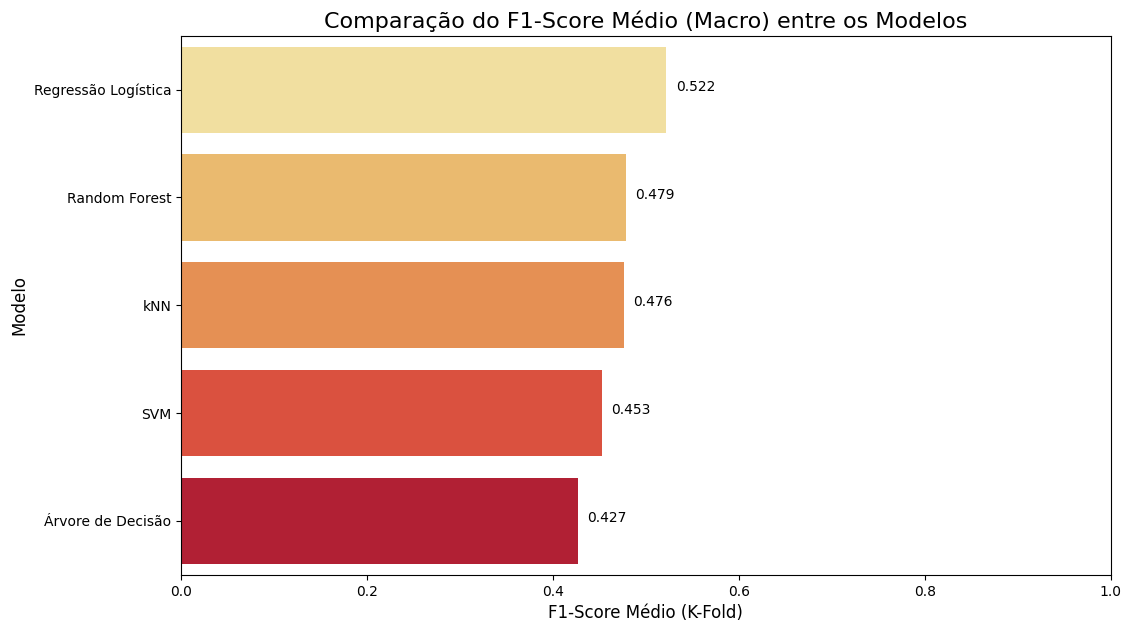

In [ ]:
print("Tabela Comparativa de Desempenho dos Modelos")
display(results_df.style.background_gradient(cmap='YlOrRd'))

# --- Gráfico Comparativo ---
results_df_sorted = results_df.sort_values(by='F1-Score', ascending=False)

plt.figure(figsize=(12, 7))
orange_barplot_palette = sns.color_palette("YlOrRd", len(results_df_sorted))
ax = sns.barplot(x=results_df_sorted['F1-Score'], y=results_df_sorted.index, palette=orange_barplot_palette, orient='h')
plt.title('Comparação do F1-Score Médio (Macro) entre os Modelos', fontsize=16)
plt.xlabel('F1-Score Médio (K-Fold)', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0, 1) # F1-score varia de 0 a 1

# Adicionar os valores exatos nas barras para clareza
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.01, p.get_y() + p.get_height()/2. + 0.01, f'{width:.3f}', ha="left")

plt.show()



### Análise dos Resultados

A tabela e o gráfico comparativo de desempenho demonstram que, entre os modelos avaliados, a **Regressão Logística alcançou o maior F1-Score (0.522)**, sendo, portanto, o modelo com o melhor desempenho preditivo geral para esta tarefa. O kNN (0.476) e o SVM (0.453) apresentaram performance intermediária, enquanto a Árvore de Decisão (0.427) teve o desempenho mais baixo.

Este resultado é interessante e sugere que as relações entre as características da laranja e sua nota de qualidade podem ser, em sua maioria, lineares. Modelos mais complexos e não-lineares, como a Árvore de Decisão, podem ter sofrido de sobreajuste (overfitting) ao ruído presente no dataset, capturando padrões nos dados de treino que não se generalizam bem para novos dados. A simplicidade e regularização inerentes à Regressão Logística provaram ser mais eficazes.

### Limitações da Análise

1.  **Qualidade dos Dados Categóricos:** A coluna `Blemishes` possui muitas variações textuais (ex: "N", "Y (Minor)", "Y (Bruising)"). O One-Hot Encoding trata cada uma como uma categoria distinta, o que pode não ser o ideal. Uma etapa de *feature engineering* para agrupar essas respostas (ex: apenas "Y" ou "N") poderia melhorar o modelo.
2.  **Tamanho do Dataset:** O conjunto de dados é relativamente pequeno (241 amostras), o que pode limitar a capacidade dos modelos mais complexos de aprender padrões robustos.
3.  **Ausência de Otimização:** Os modelos foram treinados com seus hiperparâmetros padrão. Uma busca por hiperparâmetros otimizados (tuning) com `GridSearchCV`, especialmente para SVM e kNN, poderia levar a um aumento de performance.

### Próximos Passos

1.  **Explorar Modelagem de Regressão:** Em vez de classificar, tratar o problema como uma tarefa de **regressão** para prever o valor exato da `Quality`. Modelos como `Ridge`, `Lasso` ou `GradientBoostingRegressor` poderiam ser testados.
2.  **Feature Engineering na Coluna `Blemishes`:** Limpar e simplificar a coluna `Blemishes` para uma representação binária (Presença/Ausência de defeito) para avaliar seu impacto.
3.  **Análise de Importância de Features:** Utilizar os coeficientes da Regressão Logística ou a propriedade `feature_importances_` de modelos de árvore (como RandomForest) para entender quais características (`Brix`, `pH`, `Size_cm`, etc.) são mais determinantes para a qualidade da laranja.